In [1]:
import numpy as np
from PIL import Image

In [6]:
im = Image.open("/Users/ruiqiao/Downloads/05icml-are/data/banff.bmp")

In [7]:
print(im.format, im.size, im.mode)

BMP (2048, 1536) L


In [8]:
box = (100, 100, 140, 140)
region = im.crop(box)

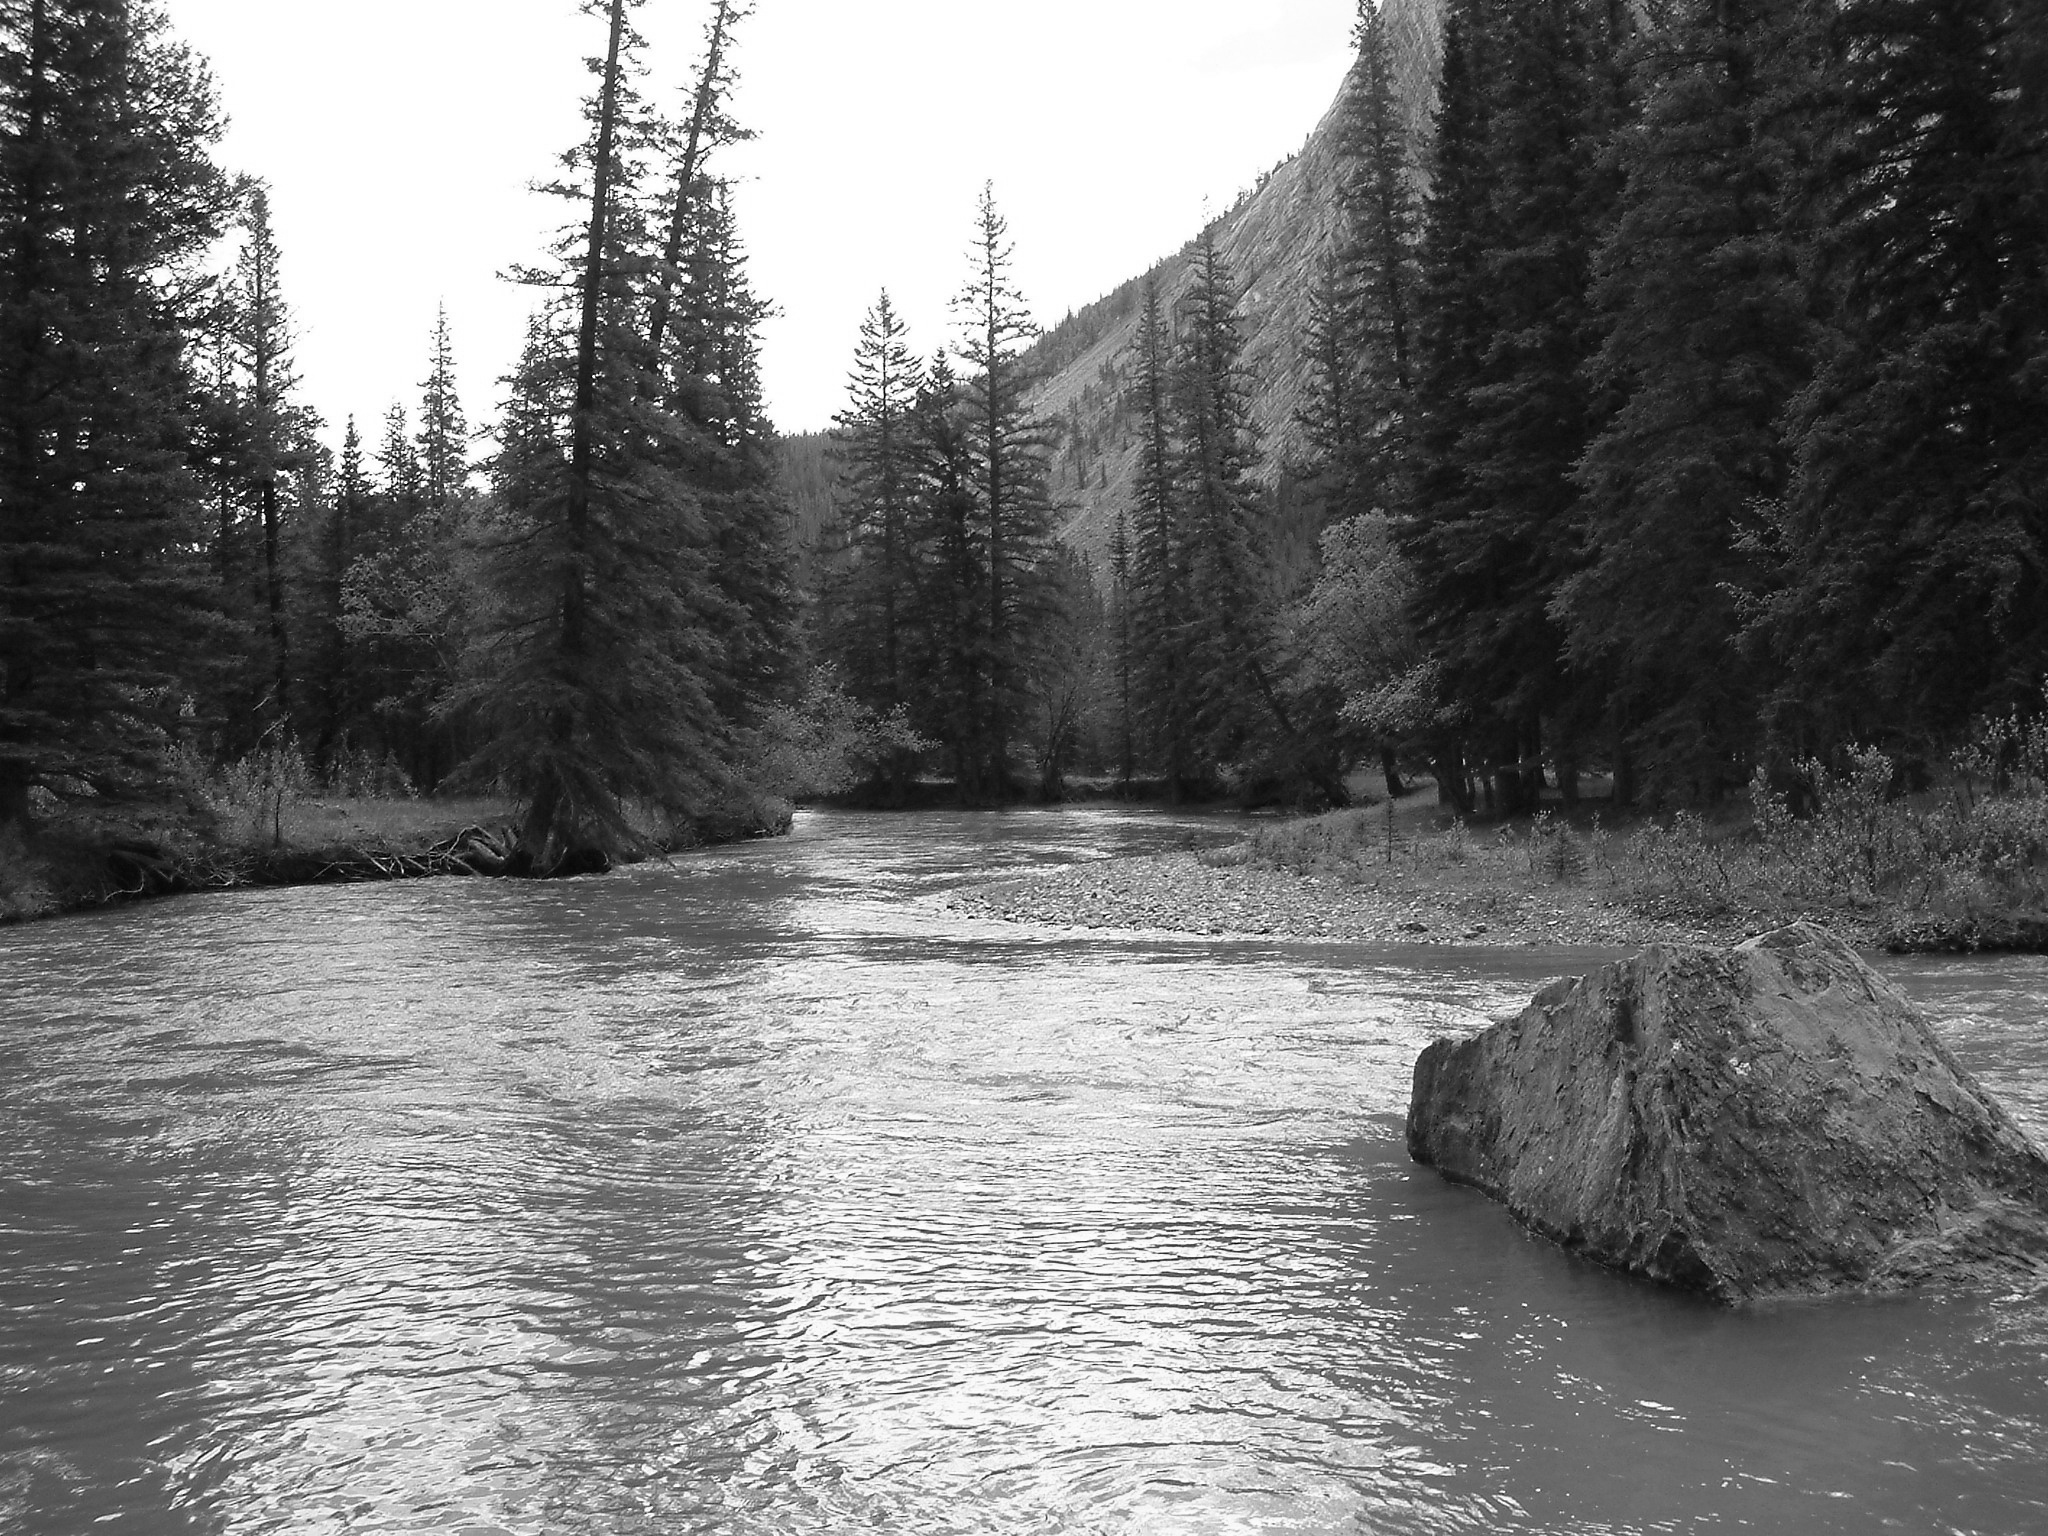

In [9]:
im

In [18]:
box = (850, 500, 950, 600)
region = im.crop(box)

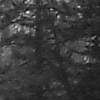

In [19]:
region

In [16]:
box = (650, 400, 750, 500)
region = im.crop(box)

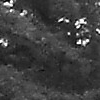

In [17]:
region

In [33]:
x = np.asarray(region,dtype = np.float32)

In [32]:
np.zeros((3,3,3))

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [119]:
def action1(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region,dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0]+i*stride, start_point[1], start_point[0]+(i+2)*stride, start_point[1]+height)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [120]:
data1, data_out1, end_point = action1((50,50),36)

In [121]:
def action2(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region, dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0], start_point[1]+i*stride, start_point[0]+width, start_point[1]+(i+2)*stride)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [122]:
data2, data_out2, end_point = action2(end_point,36)

In [123]:
def action3(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region,dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0]-i*stride, start_point[1], start_point[0]-i*stride+width, start_point[1]+height)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [124]:
data3, data_out3, end_point = action3(end_point,36)

In [128]:
def action4(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region, dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0], start_point[1]-i*stride, start_point[0]+width, start_point[1]-i*stride+height)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [132]:
data4, data_out4, end_point= action4((230,410),36)

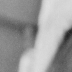

In [125]:
Image.fromarray(np.uint8(data2[9]))

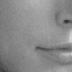

In [133]:
Image.fromarray(np.uint8(data4[3]))

In [130]:
end_point

(50, 410)

In [134]:
np.savez('output/data.npz', data1,data_out1,data2,data_out2,data3,data_out3,data4,data_out4)